In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn.metrics import  f1_score,precision_score,recall_score, accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sktime.classification.kernel_based import RocketClassifier
import requests



In [60]:
X_train = np.load(r"D:\Книги по программированию\ML Intensive\DataSets lesson 4\neymark-tsc\train_x.npy")
y_train = np.load(r"D:\Книги по программированию\ML Intensive\DataSets lesson 4\neymark-tsc\train_y.npy")
X_test_real = np.load(r"D:\Книги по программированию\ML Intensive\DataSets lesson 4\neymark-tsc\test_x.npy")


In [61]:
X_train.shape

(14667, 187)

In [62]:
X_test_real.shape

(7225, 187)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
GBT = GradientBoostingClassifier(n_estimators=200)
GBT.fit(X_train, y_train)
y_pred = GBT.predict(X_test)
f1_score(y_test, y_pred, average="macro")




0.7759444925146735

In [8]:
classifier = KNeighborsTimeSeriesClassifier(n_neighbors=4,
                                            weights = 'distance',algorithm='auto',
                                            distance="squared",
                                            distance_params={'epsilon':1})
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("f1_score:",f1_score(y_test, y_pred, average="macro"))
print("Accuracy:", precision_score(y_test,y_pred, average="macro"))
print("Recall_score:",recall_score(y_test,y_pred, average="macro"))

f1_score: 0.8212049932284466
Accuracy: 0.9139144858527377
Recall_score: 0.7618396719691203


In [9]:
rocket = RocketClassifier(num_kernels=2000)
rocket.fit(X_train, y_train)
y_pred = rocket.predict(X_test)
print("f1_score:",f1_score(y_test, y_pred, average="macro"))
print("Accuracy:", precision_score(y_test,y_pred, average="macro"))
print("Recall_score:",recall_score(y_test,y_pred, average="macro"))


f1_score: 0.8339663742830421
Accuracy: 0.9766757044125466
Recall_score: 0.7632007030418108


In [10]:
def cm_plot(y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cmn, cmap='Blues', annot=True, fmt='.2f')
    sns.set(font_scale=1.3)
    plt.title("Confusion Matrix")

    return plt.show()

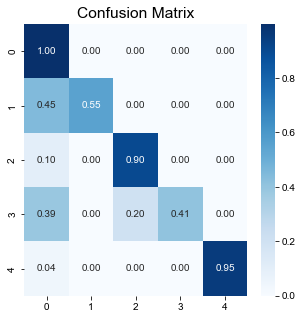

In [11]:
cm_plot(y_test, y_pred)

In [12]:
y_pred = classifier.predict(X_test_real)

y_pred_csv = pd.DataFrame()
y_pred_csv["ID"] = np.array(range(len(y_pred))).astype(int).astype(str)
y_pred_csv["Answer"] = np.array(y_pred).astype(int).astype(str)
y_pred_csv.to_csv("testing_submission.csv", index=False)
y_pred_csv

,ID,Answer
0,0,0
1,1,0
2,2,0
3,3,2
4,4,0
...,...,...
7220,7220,0
7221,7221,2
7222,7222,0
7223,7223,0
